
---

# Using the fitted NN model for Digit Recognition

---

<img src = 'https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/mnist.gif' height = '200' width = '200'>

## 1. Import MNIST data and train your model on this data.
Like in the last lesson.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

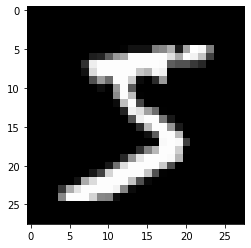

In [5]:
plt.imshow(np.reshape(train_images[0], (28,28)), cmap=plt.cm.gray);

In [6]:
train_labels[0]

5

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [8]:
model = keras.Sequential([  layers.Dense(126, activation="relu"),
                            layers.Dense(86, activation="relu"),
                            layers.Dense(64, activation="relu"),
                            layers.Dense(32, activation="relu"),
                            layers.Dense(20, activation="relu"),
                            layers.Dense(10, activation="softmax")    ])

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
%%time
model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4096 - accuracy: 0.8752
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1362 - accuracy: 0.9593
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0944 - accuracy: 0.9711
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0707 - accuracy: 0.9783
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9818
Wall time: 12.2 s


In [11]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9776
test_acc: 0.9775999784469604


## 2. Prepare and load your digits.

In [12]:
from matplotlib import image
import matplotlib.pyplot as plt

#### 2.1. Read the image files
Example of reading the **one** image file
```
img1 = image.imread('image_name.jpg')[:,:,0]
```

We use `[:, :, 0]` indexation to get 1 channel of RGB (off-color image)



In [13]:
# read all 5 image files in separate variables
img1 = image.imread('unnamed (1).jpg')[:,:,0]
img2 = image.imread('unnamed (2).jpg')[:,:,0]
img3 = image.imread('unnamed (3).jpg')[:,:,0]
img4 = image.imread('unnamed (4).jpg')[:,:,0]
img5 = image.imread('unnamed (6).jpg')[:,:,0]


In [14]:
img1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,
          5,   2,   3,   0,   3,   0,  13,   6,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16,   0,  12,   0,  22,
          0,   6,   0,   0,  17,   0,   0,   0,  17,  13,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,   0,   1,   0,
         12,   6,   3,   2,   5,  12,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7,   0,   7,  14,   0,
          0,   0,   0,   5,   0,   0,   7,  12,   2,   5,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   2,   7,  13,
        249, 255, 247, 245, 255,   5,   0,   0,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 245, 245, 240,
          0,   0,  10,  10, 243,   0,  31,   5,   0,   9,   5,   0,   0,
          0,   0],
       [  

To show the **one specific** image:
```
plt.imshow(img1, cmap=plt.cm.gray);
```


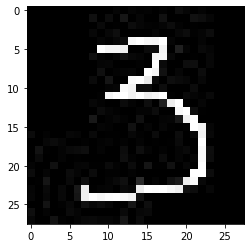

In [15]:
plt.imshow(np.reshape(img1, (28,28)), cmap=plt.cm.gray);


#### 2.2. Collect the images to one array
For example:
```
DIGITS = np.array([img1, img2, img3, ...])
```


In [16]:
DIGITS = np.array([img1, img2, img3, img4, img5 ])

#### 2.3. Reshape the images and normalize the values of pixels (form 0 to 1)
```
reshaped_DIGITS = DIGITS.reshape(len(DIGITS), (28 * 28))
reshaped_DIGITS = reshaped_DIGITS.astype("float32") / 255
```

In [17]:
reshaped_DIGITS = DIGITS.reshape(len(DIGITS), (28 * 28))
reshaped_DIGITS = reshaped_DIGITS.astype("float32") / 255



In [18]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

## 3. Use the model for digit recognition. 

#### 3.1. Predict the digits using your model and save predictions to `PREDICTIONS`

In [19]:
PREDICTIONS = model.predict(reshaped_DIGITS)
PREDICTIONS[0]

array([6.8475883e-06, 8.4881067e-06, 3.8311162e-04, 9.3752015e-01,
       1.3766714e-06, 5.9663773e-02, 2.2528038e-06, 7.8507357e-05,
       1.8159306e-03, 5.1954348e-04], dtype=float32)

In [20]:
np.argmax(PREDICTIONS[0])

3

#### 3.2. Use the following code to show the predictions:
```
for i in range(len(reshaped_DIGITS)):
    print(f"This number is {np.argmax(PREDICTIONS[i])}")
    plt.imshow(np.reshape(reshaped_DIGITS[i], (28,28)), cmap=plt.cm.gray);
    plt.show();
```

This number is 3


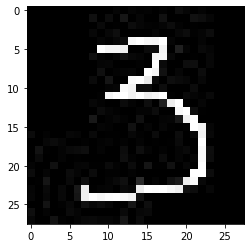

This number is 1


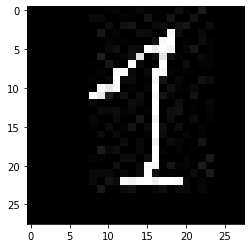

This number is 5


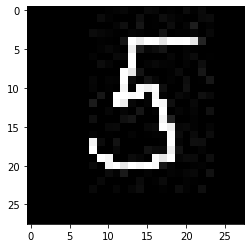

This number is 5


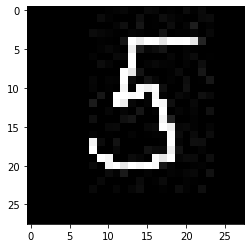

This number is 3


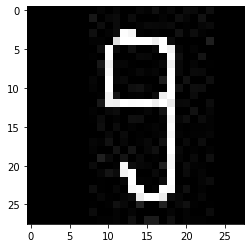

In [21]:
for i in range(len(reshaped_DIGITS)):
    print(f"This number is {np.argmax(PREDICTIONS[i])}")
    plt.imshow(np.reshape(reshaped_DIGITS[i], (28,28)), cmap=plt.cm.gray);
    plt.show();